In [8]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
import ctvis
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
df = ctvis.get_df_all()
df

,FilePathImage,FileName,FilePathMask
0,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz
1,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz
2,public-covid-data/rp_im/3.nii.gz,3.nii.gz,public-covid-data/rp_msk/3.nii.gz
3,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz
4,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz
5,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz
7,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz
8,public-covid-data/rp_im/9.nii.gz,9.nii.gz,public-covid-data/rp_msk/9.nii.gz


In [10]:
sample_path = df['FilePathImage'].iloc[0]
data = ctvis.load_nifti(sample_path)

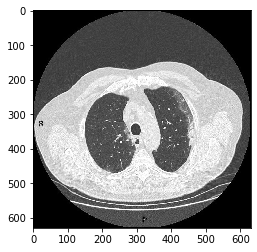

In [69]:
plt.imshow(data[:, :, 10], cmap='gray')

In [14]:
p = df['FilePathMask'].iloc[0]
seg_data = ctvis.load_nifti(p)
seg_data.shape

(630, 630, 45)

In [35]:
mask_color = ctvis.label_color(seg_data)

In [36]:
mask_color.shape

(630, 630, 45, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


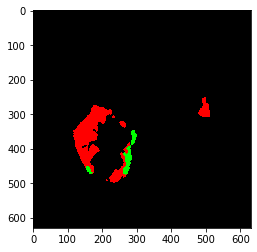

In [37]:
plt.imshow(mask_color[:, :, 30])

In [72]:
index = 0
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)

In [74]:
volume_gray = ctvis.hu_to_gray(volume)

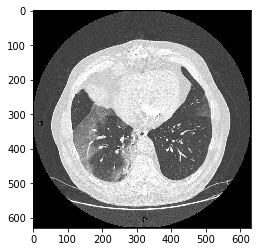

In [66]:
plt.imshow(volume_gray[:, :, 30])

In [142]:
overlayed = ctvis.overlay(volume_gray, mask, mask_color, alpha=0.5)

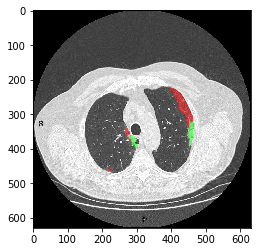

In [143]:
plt.imshow(overlayed[:, :, 10])

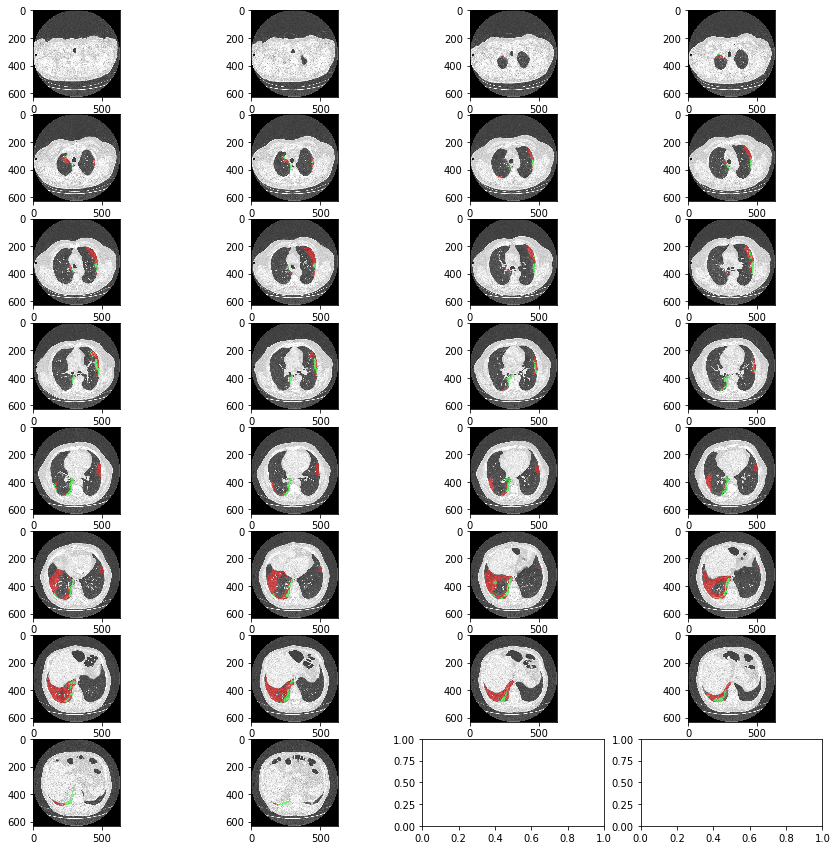

In [154]:
ctvis.vis_overlay(overlayed, cols=4, display_num=30)

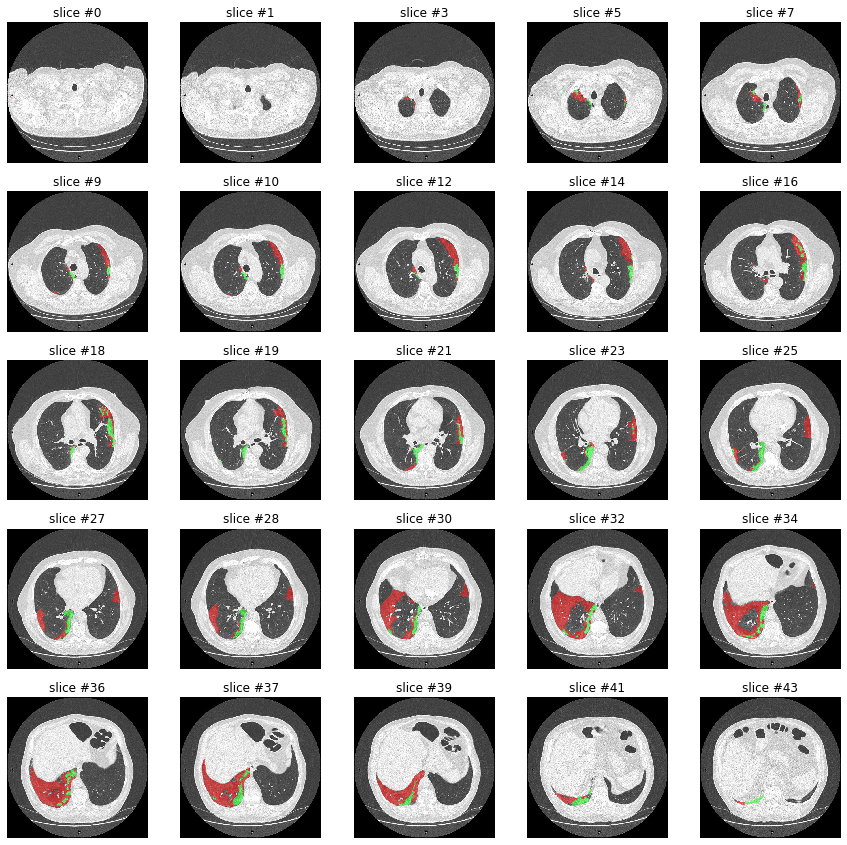

In [161]:
cols = 5
display_num = 25
rows = (display_num - 1) // cols + 1
total_num = overlayed.shape[-2]
interval = total_num / display_num
if interval < 1:
    interval = 1
figsize = (15, 15)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for i in range(display_num):
    row_i = i//cols
    col_i = i%cols
    idx = int((i * interval))
    if idx == total_num:
        break
    ax[row_i, col_i].imshow(overlayed[:, :, idx])
    ax[row_i, col_i].set_title('slice #{}'.format(idx))
    ax[row_i, col_i].axis('off')

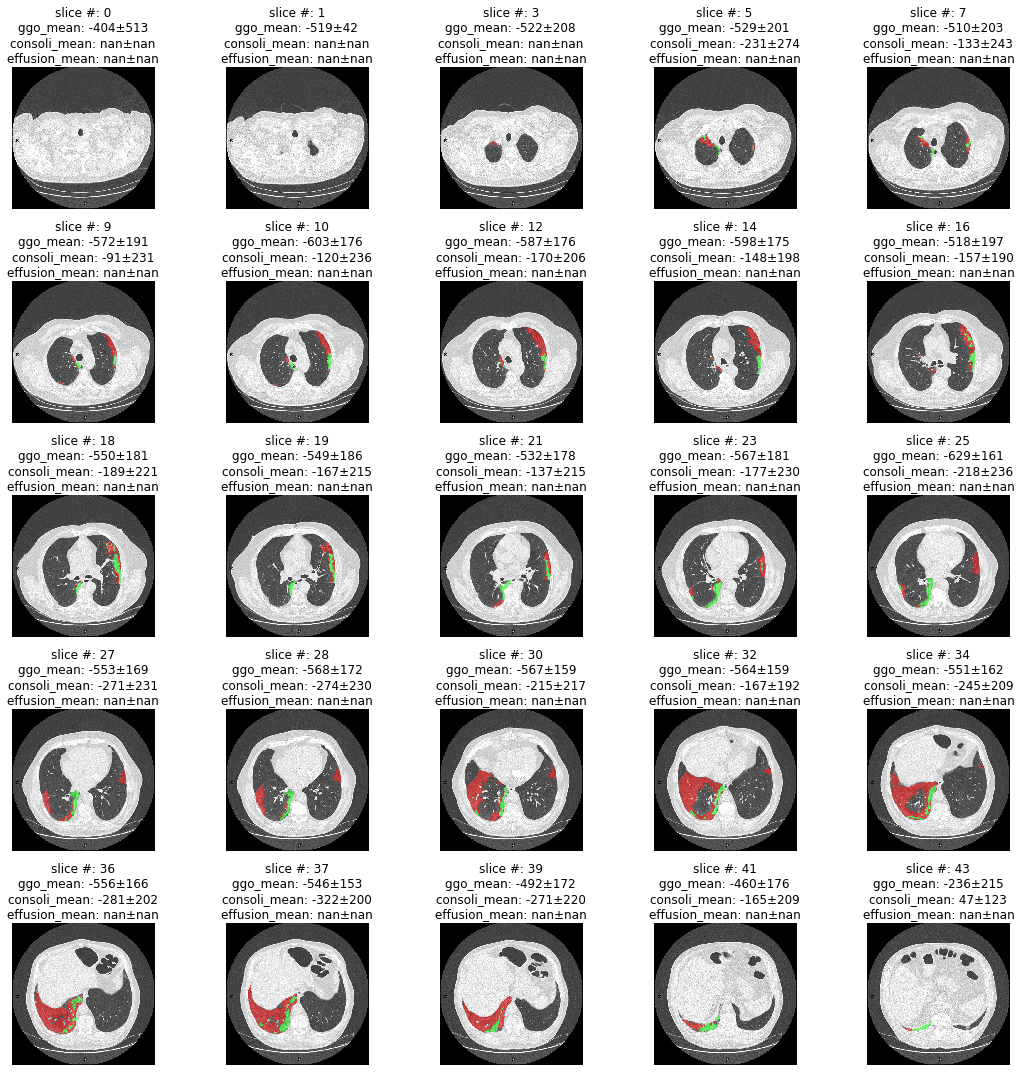

In [204]:
ctvis.vis_overlay(overlayed, volume, mask, cols=5, display_num=25)

In [173]:
# np.where(mask == 1, True, False)

# roi: region of interest
label_dict = {1: 'ggo', 2: 'consolidation', 3: 'effusion'}
result = {}

for label in label_dict.keys():
    prefix = label_dict[label]
    roi_hu = volume[np.equal(mask, label)]
    result[prefix + '_mean'] = np.mean(roi_hu)
    result[prefix+ '_std'] = np.std(roi_hu)

In [172]:
result

{'ggo_mean': -553.040983965225,
 'ggo_std': 171.02280861310823,
 'consolidationmean': -201.4915341831564,
 'consolidationstd': 227.0837774774284,
 'effusionmean': nan,
 'effusionstd': nan}

In [168]:
ggo_std

171.02280861310823

In [181]:
title = 'slice # 3'

In [182]:
title += '\nggo_mean: 30±15'

In [184]:
print(title)

slice # 3
ggo_mean: 30±15
